In [1]:
# download data from https://cellxgene.cziscience.com/collections/c353707f-09a4-4f12-92a0-cb741e57e5f0
import os, sys
HOMEDIR = os.path.expanduser("~")
PROJDIR = rf"{HOMEDIR}/G-scIB_dev"
sys.path.append(rf"{PROJDIR}/src")

import Data_Handler as dh, Utils_Handler as uh, Vis_Handler as vh
import umap, numpy as np, pandas as pd, scanpy as sc
sc.settings.set_figure_params(dpi=80, facecolor="white")
sc.settings.verbosity = 3

In [2]:
adata = sc.read_h5ad(dh.DATA_EMB_["skin"])
obsm_keys = list(adata.obsm)
for embed in obsm_keys:
    print("%12s, %d" % (embed, adata.obsm[embed].shape[1]))
    assert adata.obsm[embed].shape[0] == np.unique(adata.obsm[embed], axis=0).shape[0]

     Harmony, 30
    Islander, 16
   Scanorama, 100
     X_bbknn, 2
       X_pca, 30
    X_scANVI, 30
      X_scVI, 30
      X_tsne, 2
      X_umap, 2
      scPoli, 10


In [5]:
dataset = "skin"
_obsm = "Islander"
reducer = umap.UMAP(min_dist=1.0)
embedding = reducer.fit_transform(adata.obsm[_obsm])
adata.obsm["%s_UMAP" % _obsm] = embedding

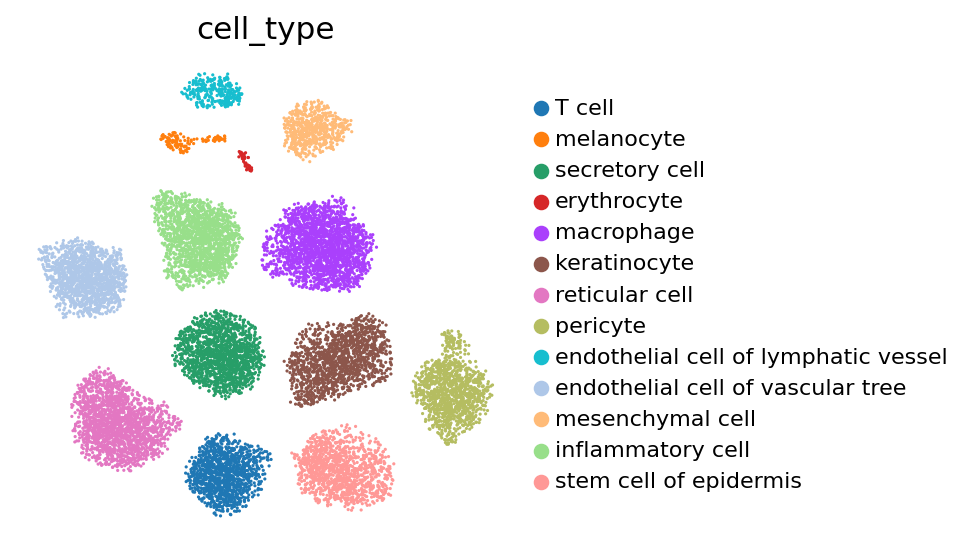

In [6]:
sc.pl.embedding(
    adata,
    basis="%s_UMAP" % _obsm,
    color=[dh.META_[dataset]["celltype"]],  
    **vh.cfg
)

In [7]:
adata.write(dh.DATA_EMB_["skin"], compression="gzip")

In [3]:
sc.pp.highly_variable_genes(adata, subset=True, flavor="seurat_v3", n_top_genes=1000)
adata

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'variances_norm', float vector (adata.var)


AnnData object with n_obs × n_vars = 14546 × 1000
    obs: 'age', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'organism_ontology_term_id', 'is_primary_data', 'donor_id', 'suspension_type', 'Cluster', 'Celltype', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'n_counts', 'n_genes', '_scvi_batch', '_scvi_labels', 'conditions_combined'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'Celltype_colors', '_scvi_manager_uuid', '_scvi_uuid', 'cell_type_colors', 'cell_type_ontology_term_id_colors', 'log1p', 'schema_version', 'title', 'tsne', 'hvg'
    obsm: 'Harmony', 'Scanorama', 'X_bbknn', 'X_pca', 'X_scANVI', 'X_scVI', '

In [4]:
adata.write(rf"{dh.DATA_DIR}/skin/emb_hvg.h5ad", compression="gzip")

### Process the Raw Data

In [3]:
adata = sc.read_h5ad(dh.DATA_RAW_["skin"])

In [4]:
adata

AnnData object with n_obs × n_vars = 15457 × 30933
    obs: 'age', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'organism_ontology_term_id', 'is_primary_data', 'donor_id', 'suspension_type', 'Cluster', 'Celltype', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    uns: 'cell_type_ontology_term_id_colors', 'schema_version', 'title'
    obsm: 'X_pca', 'X_umap'

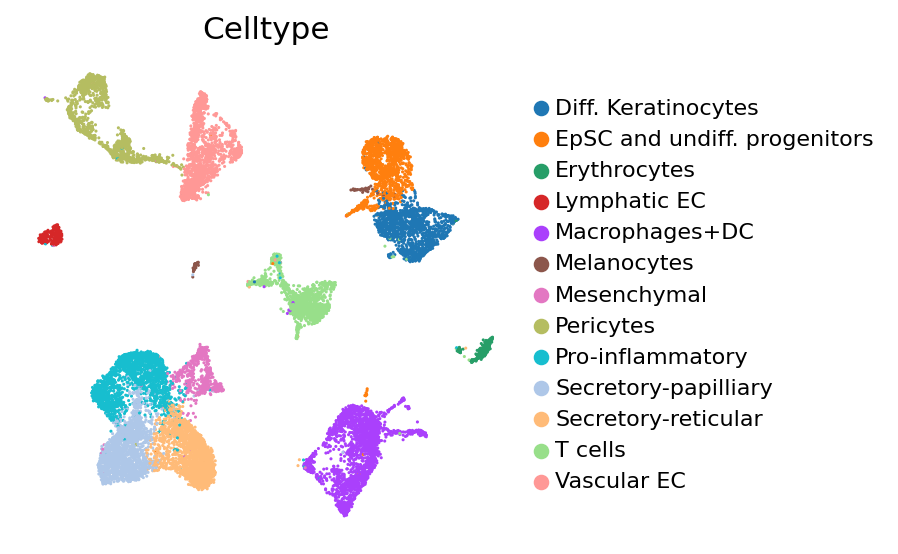

In [5]:
sc.pl.embedding(
    adata,
    basis="X_umap",
    color=["Celltype"],
    **vh.cfg
)

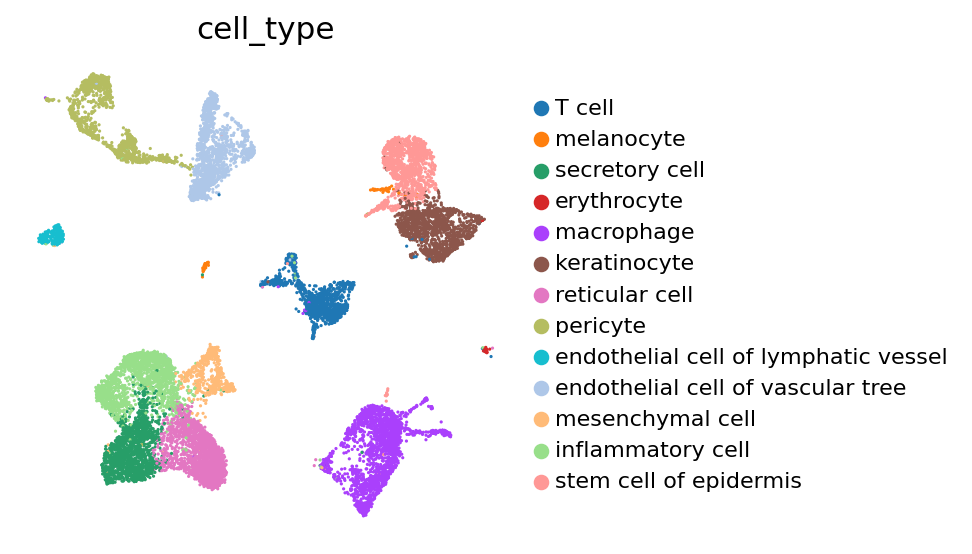

In [8]:
sc.pl.embedding(
    adata,
    basis="X_umap",
    color=["cell_type"],
    **vh.cfg
)

In [6]:
adata.raw

In [7]:
adata.X = adata.raw.X
del adata.raw
uh.preprocess(adata)

filtered out 579 cells that have less than 1000 counts
filtered out 332 cells that have less than 500 genes expressed
filtered out 11739 genes that are detected in less than 5 cells
19194 genes x 14546 cells after quality control.
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


AnnData object with n_obs × n_vars = 14546 × 19194
    obs: 'age', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'organism_ontology_term_id', 'is_primary_data', 'donor_id', 'suspension_type', 'Cluster', 'Celltype', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'n_counts', 'n_genes'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'n_cells'
    uns: 'cell_type_ontology_term_id_colors', 'schema_version', 'title', 'Celltype_colors', 'log1p'
    obsm: 'X_pca', 'X_umap'

In [9]:
adata.obs["donor_id"].unique()

['S1', 'S2', 'S3', 'S4', 'S5']
Categories (5, object): ['S1', 'S2', 'S3', 'S4', 'S5']

In [10]:
for _obs in adata.obs:
    print(_obs)
    print(adata.obs[_obs].unique())
    print("="*77 + "\n\n")

age
['YOUNG', 'OLD']
Categories (2, object): ['OLD', 'YOUNG']


tissue_ontology_term_id
['UBERON:0000014']
Categories (1, object): ['UBERON:0000014']


assay_ontology_term_id
['EFO:0009899']
Categories (1, object): ['EFO:0009899']


disease_ontology_term_id
['PATO:0000461']
Categories (1, object): ['PATO:0000461']


cell_type_ontology_term_id
['CL:0000084', 'CL:0000312', 'CL:0000235', 'CL:1000428', 'CL:0000432', ..., 'CL:0008019', 'CL:0002139', 'CL:0000148', 'CL:0002138', 'CL:0000232']
Length: 13
Categories (13, object): ['CL:0000084', 'CL:0000148', 'CL:0000151', 'CL:0000232', ..., 'CL:0002139', 'CL:0008019', 'CL:0009002', 'CL:1000428']


self_reported_ethnicity_ontology_term_id
['unknown']
Categories (1, object): ['unknown']


development_stage_ontology_term_id
['HsapDv:0000119', 'HsapDv:0000121', 'HsapDv:0000147', 'HsapDv:0000164', 'HsapDv:0000163']
Categories (5, object): ['HsapDv:0000119', 'HsapDv:0000121', 'HsapDv:0000147', 'HsapDv:0000163', 'HsapDv:0000164']


sex_ontology_term_i

In [11]:
adata

AnnData object with n_obs × n_vars = 14546 × 19194
    obs: 'age', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'organism_ontology_term_id', 'is_primary_data', 'donor_id', 'suspension_type', 'Cluster', 'Celltype', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'n_counts', 'n_genes'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'n_cells'
    uns: 'cell_type_ontology_term_id_colors', 'schema_version', 'title', 'Celltype_colors', 'log1p', 'cell_type_colors'
    obsm: 'X_pca', 'X_umap'

In [12]:
adata.write(rf"{dh.DATA_DIR}/Skin/emb.h5ad", compression="gzip")

#### Save the metadata

In [2]:
adata = sc.read_h5ad(rf"{dh.DATA_DIR}/Skin/emb.h5ad")

In [3]:
adata

AnnData object with n_obs × n_vars = 14546 × 19194
    obs: 'age', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'organism_ontology_term_id', 'is_primary_data', 'donor_id', 'suspension_type', 'Cluster', 'Celltype', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'n_counts', 'n_genes'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'n_cells'
    uns: 'Celltype_colors', 'cell_type_colors', 'cell_type_ontology_term_id_colors', 'log1p', 'schema_version', 'title'
    obsm: 'X_pca', 'X_umap'

In [4]:
os.makedirs(rf"{dh.META_DIR}/skin")

In [5]:
import json
CELL2CAT = dict()
for idx, batch in enumerate(adata.obs["cell_type"].unique()):
    CELL2CAT[batch] = idx
_file = open(rf"{dh.META_DIR}/skin/cell2cat.json", "w")
_file.write(json.dumps(CELL2CAT))
_file.close()

BATCH2CAT = dict()
for idx, batch in enumerate(adata.obs["donor_id"].unique()):
    BATCH2CAT[batch] = idx
_file = open(rf"{dh.META_DIR}/skin/batch2cat.json", "w")
_file.write(json.dumps(BATCH2CAT))
_file.close()